

```
# This is formatted as code
```

#Exploratory data analysis - Credit Card Fraud Detection 

###Credit Card Fraud problem and solution
Detecting fraud transactions is of great importance for any credit card company. 
It is important to  detect potential frauds so that customers are not charged for items that they did not purchase.

###About Dataset
The Dataset contains two-day transactions made on 09/2013 by European cardholders.
The dataset contains 492 frauds out of 284,807 transactions. 
Thus, it is highly unbalanced, with the positive (frauds) accounting for only 0.17%.

###Feature Importance
Features V1, V2, … V28 are the principal components.
The only features which have not been transformed are ‘Time’ and ‘Amount’.
‘Time’ is the seconds elapsed between each transaction and the first. ‘Amount’ is the transaction amount. 
‘Class’ is the response variable with 1 as fraud and 0 otherwise.



###Importing the Necessary Python Libraries 

In [2]:
import pandas as pd
import  numpy as np
import sklearn 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy 
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.svm import OneClassSVM
from pylab import rcParams 
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED=42
LABELS =["Normal","Fraud"]
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/drive/MyDrive/Credit Card Fraud Detection /creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##Total Number of Records 

In [4]:
df.shape

(284807, 31)

##Different Features of the Data set

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

###Data Quality Check 
######Check for NULL/MISSING values

In [6]:
# percentage of missing values in each column
print(round(100 * (df.isnull().sum()/len(df)),2).sort_values(ascending=False))
print('is there Any Missing Value:',df.isnull().values.any())

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64
is there Any Missing Value: False


###Duplicate Check 

In [7]:
df.isnull().sum().max()

0

#Descriptive Analysis 

In [8]:
# To get all the details
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


##To Check Data Types

In [9]:
#To check the Data types of the features
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
# to get all the information about all the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##Distribution of features

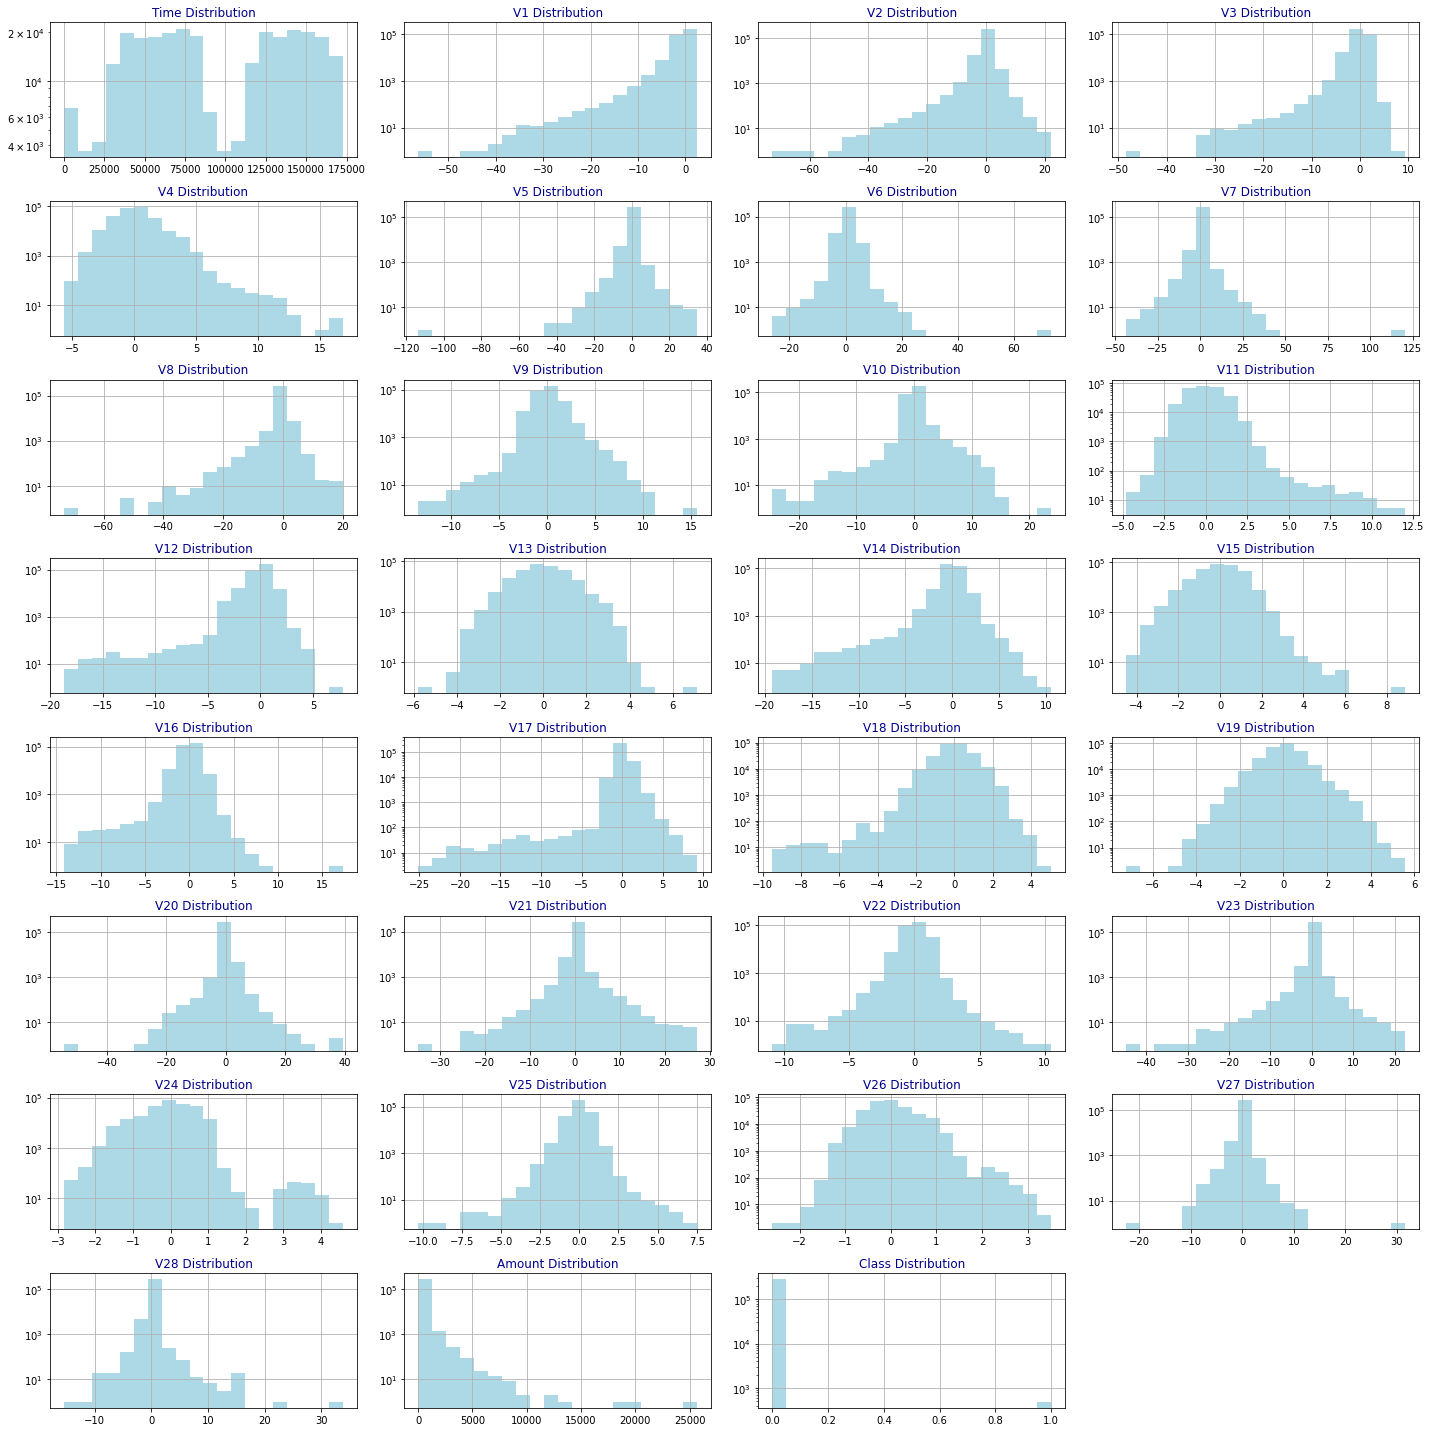

In [12]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='lightBlue')
        ax.set_title(feature+" Distribution",color='DarkBlue')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,8,4)

##Checking for Outliers in the dataset

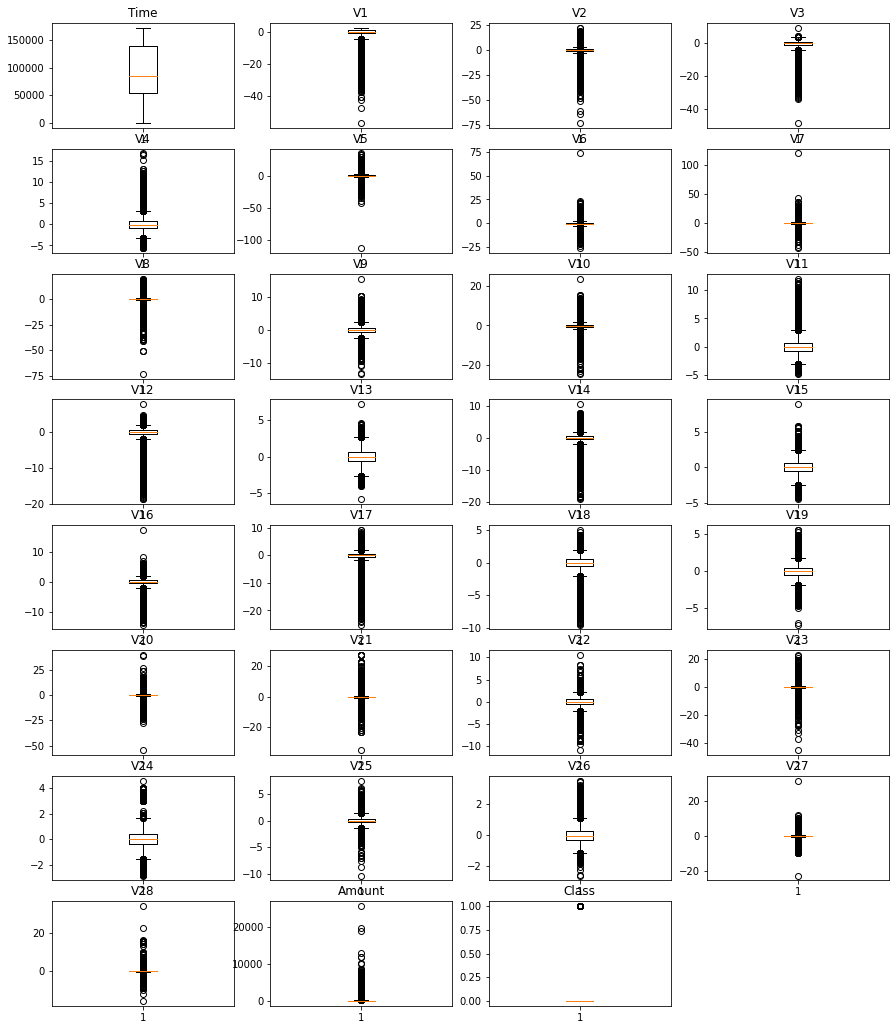

In [13]:
# Checking for the Outliers in the dataset
plt.figure(figsize = (15,25))
count = 1
for col in df:
    plt.subplot(11,4,count)
    plt.boxplot(df[col])
    plt.title(col)
    count += 1
plt.show()

##Comparing the Distributions of each Feature to the Target Classes
Below, violin plots are used to compare the distributions of each feature to the target dataset. Beyond showing that there are differences in the distributions between each class (good!), an argument can be made towards performing some kind of outlier removal prior to training the model. Depending on the model used, outliers can have a relatively large impact on the model (sometimes referred to as "high leverage").




In [ ]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=6, cols=5, subplot_titles=list(df.columns))  

for row_num in range(1, 7):
    start_list = 0 + ((row_num-1) * 5)
    end_list = 5 + ((row_num-1) * 5)
    for idx, feature in enumerate(list(df.columns)[start_list: end_list]):
        fig.add_trace(go.Violin(x=df["Class"][df["Class"] == 1],
                                y=df[feature][df["Class"] == 1],
                                legendgroup="Fraud", scalegroup="Fraud", name="Fraud",
                                line_color="blue"),
                      row=row_num, col=(idx+1))
        fig.add_trace(go.Violin(x=df["Class"][df["Class"] == 0][::100], # 1 in 100 otherwise will crash...
                                y=df[feature][df["Class"] == 0][::100], # 1 in 100 otherwise will crash...
                                legendgroup="Not Fraud", scalegroup="Not Fraud", name="Not Fraud",
                                line_color='orange'),
                      row=row_num, col=(idx+1))

fig.update_traces(meanline_visible=True)
fig.update_layout(showlegend=False, violingap=0, height=1500,
                  title_text="Distributions of Fraudulent vs Not Fraudulent Transactions along each PC and Amount")
fig.show()

##Correlation Matrix 

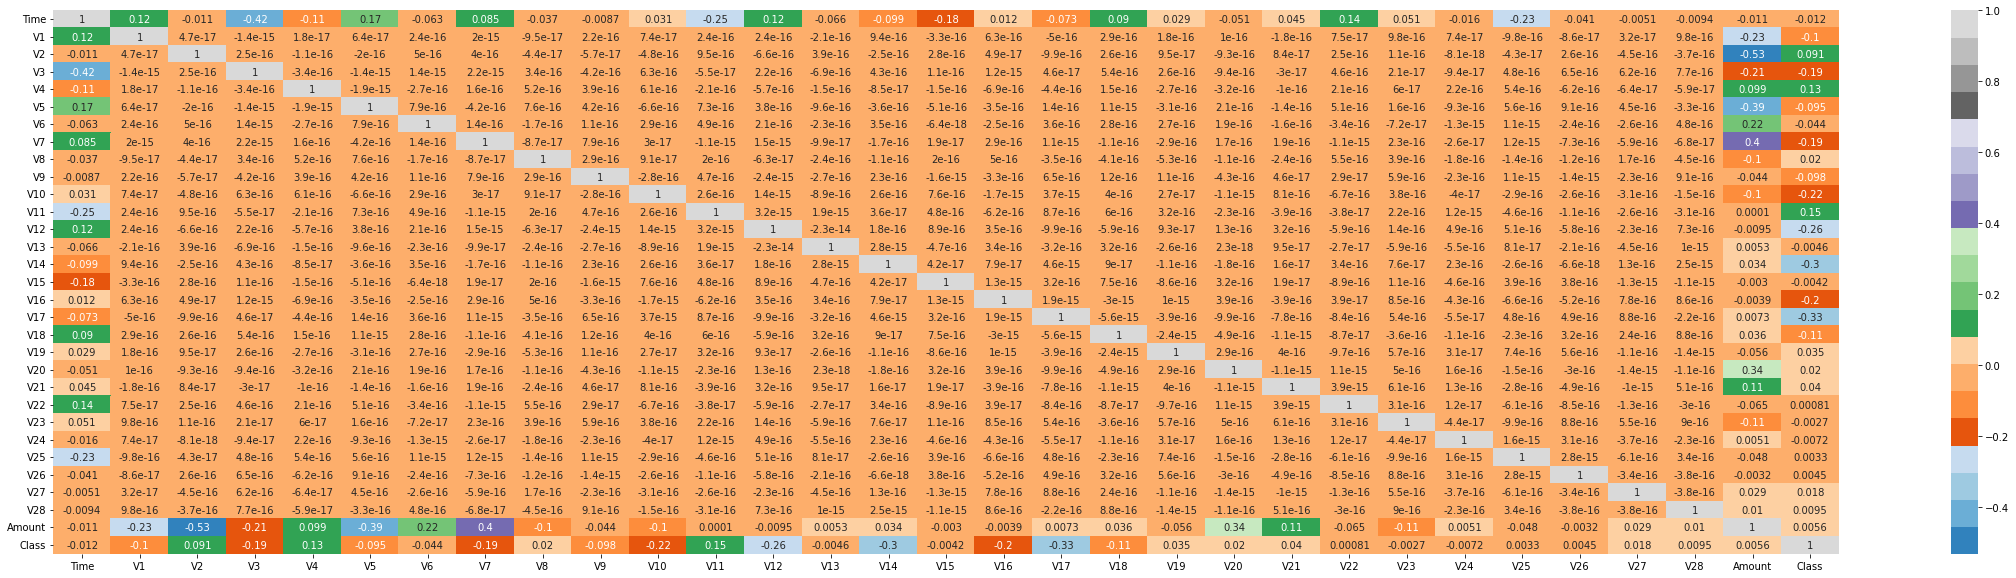

In [14]:
plt.figure(figsize = (40,10))
sns.heatmap(df.corr(), annot = True, cmap="tab20c")
plt.show()

##Transaction Class Distribution

0    284315
1       492
Name: Class, dtype: int64

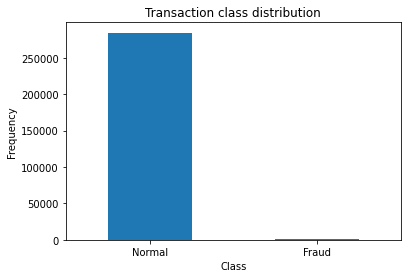

In [15]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");
df["Class"].value_counts()

##Do fraudulent transactions occur more often during certain time?

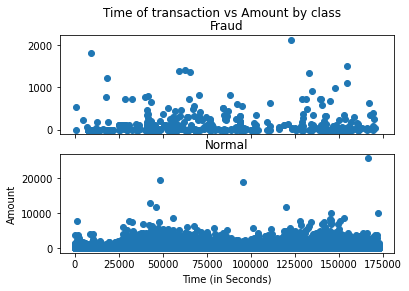

In [ ]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


##Amount Per Transacion by Class



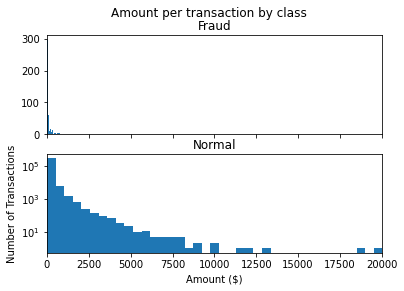

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



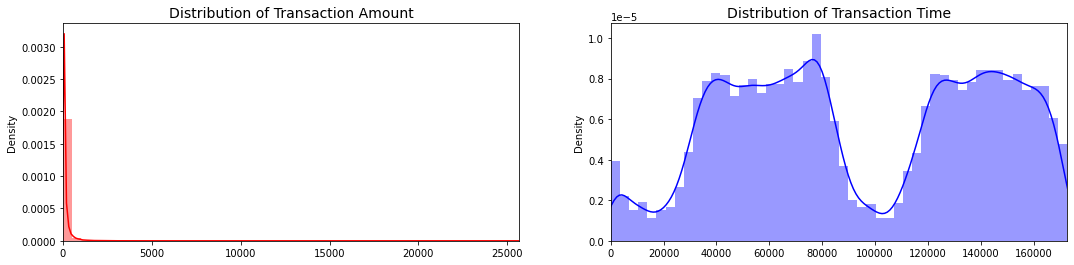

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df.Amount.values
time_val = df.Time.values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

In [ ]:
for item in df.columns:
    print(item, ": " )
    print(df[item].unique())
    print(df[item].value_counts())
    print("************************************************")
    %matplotlib inline

Time : 
[0.00000e+00 1.00000e+00 2.00000e+00 ... 1.72787e+05 1.72788e+05
 1.72792e+05]
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
2088.0       1
64100.0      1
42068.0      1
119630.0     1
140344.0     1
Name: Time, Length: 124592, dtype: int64
************************************************
V1 : 
[-1.35980713  1.19185711 -1.35835406 ...  1.91956501 -0.24044005
 -0.53341252]
 2.055797    77
 1.245674    77
 2.053311    62
 1.302378    60
 2.040211    53
             ..
-0.069327     1
-1.619420     1
 1.174923     1
 2.157306     1
 2.287784     1
Name: V1, Length: 275663, dtype: int64
************************************************
V2 : 
[-0.07278117  0.26615071 -1.34016307 ... -0.30125385  0.53048251
 -0.18973334]
 0.166975    77
-0.326668    77
 0.089735    62
-0.606529    60
-0.146975    53
             ..
 0.520114     1
-0.419199     1
-0.303794     1
 0.167497     1
-0.166213     1
Name: V2, Length: 275663, dtype: int64
*********

0    284315
1       492
Name: Class, dtype: int64


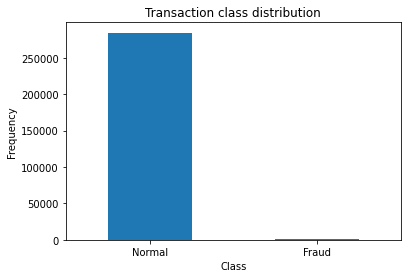

In [ ]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");
print(df["Class"].value_counts())